In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

In [26]:
for col in data.columns: 
    print(col)

Unnamed: 0
Id
Name
Year
Gender
State
Count


In [27]:
#Delete unnamed columns
data.drop('Unnamed: 0',axis=1,inplace= True)
data

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...
1016390,5647422,Seth,2014,M,WY,5
1016391,5647423,Spencer,2014,M,WY,5
1016392,5647424,Tyce,2014,M,WY,5
1016393,5647425,Victor,2014,M,WY,5


In [28]:
#2.Show the distribution of male and female
data.groupby(['Gender']).count()

,Id,Name,Year,State,Count
Gender,,,,,
F,558846,558846,558846,558846,558846
M,457549,457549,457549,457549,457549


In [29]:
#3. Show the top 5 most preferred names
data.groupby(['Name']).count().sort_values(by=['Count'], ascending=False).head()

,Id,Year,Gender,State,Count
Name,,,,,
Riley,1112,1112,1112,1112,1112
Avery,1080,1080,1080,1080,1080
Jordan,1073,1073,1073,1073,1073
Peyton,1064,1064,1064,1064,1064
Hayden,1049,1049,1049,1049,1049


In [30]:
#4. What is the median name occurence in the dataset
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

In [31]:
namecount = data.groupby(['Name']).count()
namecount.drop(['Id','Gender','Year','State'],axis=1,inplace=True)
Countval = namecount['Count'].values
mediancount = median(Countval)
#mediancount
namecount.loc[namecount['Count'] == mediancount]

,Count
Name,
Abubakar,8
Adelie,8
Adira,8
Adylene,8
Aerial,8
...,...
Zamaya,8
Zanaya,8
Zari,8


In [34]:
#5.5. Distribution of male and female born count by states
#data = data.groupby(['Gender'])
#data.pivot(index='Gender', columns='State',values='Count')
#data['Gender'].value_counts().plot(kind='bar')
#data.plot(kind='bar')
#data.drop(['Id','Year','Count'],axis=1,inplace=True)
#data.plot(kind='bar')
data.groupby('State')['Gender'].value_counts()

State  Gender
AK     M         2587
       F         2404
AL     F         9878
       M         8419
AR     F         7171
                 ... 
WI     M         8940
WV     F         4305
       M         3733
WY     M         1904
       F         1456
Name: Gender, Length: 102, dtype: int64

In [1]:
#Tasks 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.optimize as optimize


[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]


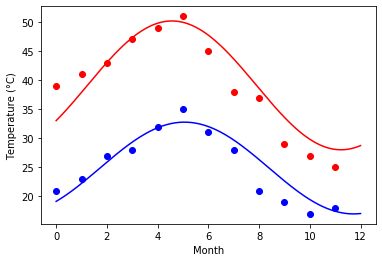

In [2]:
def yearly_temps(times, avg, ampl, time_offset): 
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))
temp_max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
temp_min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
months = 0,1,2,3,4,5,6,7,8,9,10,11
res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0]) 
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0]) 
print(res_max) 
print(res_min) 
days = np.linspace(0, 12, num=365) 
plt.figure() 
plt.plot(months,temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-') 
plt.plot(months,temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-') 
plt.xlabel('Month') 
plt.ylabel('Temperature (°C)') 
plt.show()